# usage check

In [2]:
! conda install -c conda-forge -y my-sql-connector

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - my-sql-connector

Current channels:

  - https://conda.anaconda.org/conda-forge/linux-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/linux-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/linux-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [1]:
from sqlalchemy import create_engine, types
from datetime import datetime, timedelta
from IPython.display import display
import matplotlib.pyplot as plt
import reliant_scrape as rs
import mysql.connector
import pandas as pd
import numpy as np
import pprint
import boto3
import boto
import json
import sys
import os

base = os.path.join('C:\\', 'Users', 'steve', 'Documents', 'reliant-scrape')
data = os.path.join(base, 'data')
pp = pprint.PrettyPrinter(indent = 1)

with open('db_creds.json', 'r') as f:
    db_creds = json.load(f)
print('imported modules')

ModuleNotFoundError: No module named 'mysql'

## get dataset

In [6]:
master = rs.mysql_query('SELECT * FROM reliant_energy_db.daily_use', db_creds)
print('data has data types: {}.'.format(master.dtypes))
print('data has shape: {}'.format(master.shape))

data has data types: Date           datetime64[ns]
Usage (kWh)           float64
Cost ($)              float64
Hi                      int64
Low                     int64
dtype: object.
data has shape: (984, 5)


In [9]:
metadata = rs.mysql_query('SELECT MIN(Date) as min_date, MAX(Date) as max_date, COUNT(*) as count FROM reliant_energy_db.daily_use', db_creds)
metadata

,min_date,max_date,count
0,2020-08-25,2020-10-10 23:00:00,984


## master data

In [7]:
master.head()

,Date,Usage (kWh),Cost ($),Hi,Low
0,2020-08-25 00:00:00,1.1,0.13,94,79
1,2020-08-25 01:00:00,1.2,0.14,94,79
2,2020-08-25 02:00:00,1.0,0.12,94,79
3,2020-08-25 03:00:00,1.0,0.12,94,79
4,2020-08-25 04:00:00,1.5,0.18,94,79


In [8]:
master.tail()

,Date,Usage (kWh),Cost ($),Hi,Low
979,2020-10-10 19:00:00,5.3,0.64,86,68
980,2020-10-10 20:00:00,3.1,0.37,86,68
981,2020-10-10 21:00:00,2.4,0.29,86,68
982,2020-10-10 22:00:00,2.4,0.29,86,68
983,2020-10-10 23:00:00,2.2,0.26,86,68


## plots

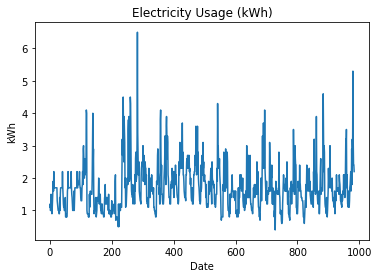

In [10]:
plt.title('Electricity Usage (kWh)')
plt.xlabel('Date')
plt.ylabel('kWh')
plt.plot(master['Usage (kWh)'])
plt.show()

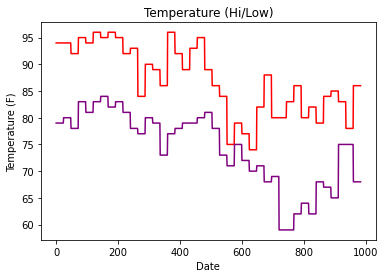

In [11]:
plt.title('Temperature (Hi/Low)')
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.plot(master['Hi'], color = 'red')
plt.plot(master['Low'], color = 'purple')
plt.show()